# Load Dataset

In [3]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# !kaggle datasets download -d mmoreaux/audio-cats-and-dogs

In [107]:
import kagglehub

!kaggle datasets download -d mmoreaux/environmental-sound-classification-50



Dataset URL: https://www.kaggle.com/datasets/mmoreaux/environmental-sound-classification-50
License(s): CC-BY-NC-SA-4.0
 99% 1.41G/1.42G [00:17<00:00, 139MB/s]
100% 1.42G/1.42G [00:17<00:00, 87.9MB/s]


In [4]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/audio-cats-and-dogs.zip', 'r')
# zip_ref.extractall('/content/kaggle')
# zip_ref.close()

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/combined-data-set.zip', 'r')
zip_ref.extractall('/content/new-dataset-combined')
zip_ref.close()


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/test-sound-new.zip', 'r')
zip_ref.extractall('/content/new-sounds-test-dataset')
zip_ref.close()


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/cat-meows.zip', 'r')
zip_ref.extractall('/content/new-sounds-all-cat-meows')
zip_ref.close()


In [108]:
import zipfile
zip_ref = zipfile.ZipFile('/content/environmental-sound-classification-50.zip', 'r')
zip_ref.extractall('/content/esc-50-dataset')
zip_ref.close()


# Deafault Weights

In [7]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import librosa
import scipy
import glob
import csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


In [8]:
# Load the model.
model_yamnet = hub.load('https://tfhub.dev/google/yamnet/1')
# model_yamnet = hub.load('/content/saved_model.pb')

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv

import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

In [10]:
# Find the name of the class with the top score when mean-aggregated across frames.
def class_names_from_csv(class_map_csv_text):
  """Returns list of class names corresponding to score vector."""
  class_names = []
  with tf.io.gfile.GFile(class_map_csv_text) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      class_names.append(row['display_name'])

  return class_names

class_map_path = model_yamnet.class_map_path().numpy()
class_names = class_names_from_csv(class_map_path)

In [11]:
def ensure_sample_rate(original_sample_rate, waveform,
                       desired_sample_rate=16000):
  """Resample waveform if required."""
  if original_sample_rate != desired_sample_rate:
    desired_length = int(round(float(len(waveform)) /
                               original_sample_rate * desired_sample_rate))
    waveform = scipy.signal.resample(waveform, desired_length)
  return desired_sample_rate, waveform

In [12]:
!curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  153k  100  153k    0     0   735k      0 --:--:-- --:--:-- --:--:--  735k


In [13]:
!curl -O https://storage.googleapis.com/audioset/miaow_16k.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  210k  100  210k    0     0  1244k      0 --:--:-- --:--:-- --:--:-- 1252k


In [14]:
!pip install pydub

In [15]:
import scipy

In [16]:
import scipy.io.wavfile as wav
import numpy as np
from scipy.signal import resample

# Function to convert audio to mono and 16kHz sample rate, and return sample_rate and wav_data
def convert_audio(input_file, target_rate=16000):
    # Read the input file
    sample_rate, data = wav.read(input_file)

    # If stereo (more than 1 channel), convert to mono by averaging the channels
    if len(data.shape) > 1:
        data = np.mean(data, axis=1).astype(np.int16)

    # Resample audio to target sample rate (16kHz)
    duration = len(data) / sample_rate
    new_length = int(duration * target_rate)
    resampled_data = resample(data, new_length).astype(np.int16)

    # Return the sample rate and the resampled wav data
    return target_rate, resampled_data


# Example usage
# input_file = "/content/human-dog.MP3"  # Replace with your uploaded file path
# output_file = "/content/human-dog-out.wav"  # Output file path

# convert_audio('/content/cat-sound.wav')


In [17]:
wav_file_name = 'speech_whistling2.wav'
wav_file_name = '/content/human-dog-out.wav'
# wav_file_name = 'miaow_16k.wav'
wav_file_name = '/content/Cat Meowing - Sound Effect - Download.wav'
wav_file_name = '/content/female pomeranian dog barking ｜ pomeranian Puppies Barking.wav'
wav_file_name = '/content/speech_whistling2.wav'
wav_file_name = '/content/Cat Meowing - Sound Effect - Download.wav'
wav_file_name = '/content/kaggle/cats_dogs/test/cats/cat_110.wav'
wav_file_name = '/content/kaggle/cats_dogs/train/dog/dog_barking_1.wav'
wav_file_name = '/content/kaggle/cats_dogs/train/dog/dog_barking_111.wav'
wav_file_name = '/content/kaggle/cats_dogs/train/dog/dog_barking_25.wav'
wav_file_name = '/content/new-dataset/cat-and-dog/cat/cat0027.wav'
wav_file_name = '/content/new-dataset/cat-and-dog/cat/cat0038.wav'
wav_file_name = '/content/new-dataset/cat-and-dog/dog/dog0025.wav'
wav_file_name = '/content/miaow_16k.wav'



sample_rate, wav_data = convert_audio(wav_file_name)
sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

# Show some basic information about the audio.
duration = len(wav_data)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(wav_data)}')

# Listening to the wav file.
Audio(wav_data, rate=sample_rate)

waveform = wav_data / tf.int16.max

scores, embeddings, spectrogram = model_yamnet(waveform)

scores_np = scores.numpy()
# print(scores_np.mean(axis=0))
spectrogram_np = spectrogram.numpy()
infered_class = class_names[scores_np.mean(axis=0).argmax()]

mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]

print(class_names[top_class_indices[1]])

print(f'The main sound is: {infered_class}')

<ipython-input-16-458177f3811b>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 6.73s
Size of the input: 107698
Domestic animals, pets
The main sound is: Animal


## Visualization

[ 67  68  76  78  93  94  81  80  69 103]


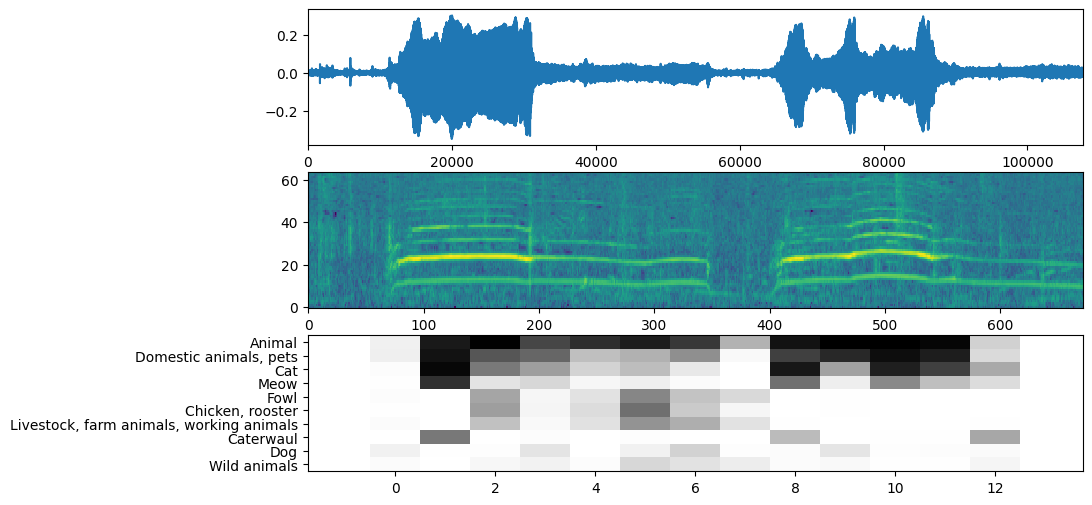

In [18]:
plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

print(top_class_indices)

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

[[-2.340365  -2.4082675 -2.9147615 ... -1.9345467 -2.1910505 -2.724824 ]
 [-2.6085396 -1.9877855 -2.2110033 ... -2.174355  -1.8793231 -2.1158304]
 [-1.7609422 -1.0742167 -1.1173067 ... -2.2850938 -2.46636   -2.2468753]
 ...
 [-1.6022599 -1.9902135 -1.9113342 ... -1.8138709 -2.2080107 -2.439632 ]
 [-1.9564372 -2.1218886 -1.8339764 ... -2.1920457 -2.1139069 -2.4963584]
 [-1.7334923 -1.8713899 -1.9561157 ... -2.2021534 -1.8027093 -2.2412434]]
(64, 672)


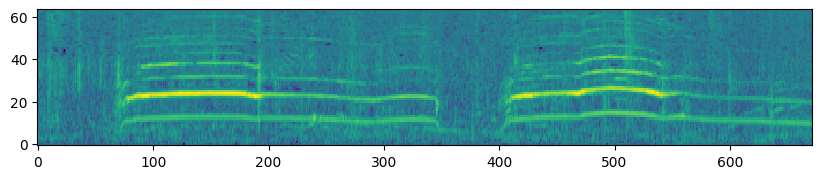

In [19]:
plt.figure(figsize=(10, 6))

# Plot the waveform.
# plt.subplot(3, 1, 1)
# plt.plot(waveform)
# plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
print(spectrogram_np.T)
print(spectrogram_np.T.shape)
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
# mean_scores = np.mean(scores, axis=0)
# top_n = 10
# top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
# plt.subplot(3, 1, 3)
# plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# print(top_class_indices)

# # patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# # values from the model documentation
# patch_padding = (0.025 / 2) / 0.01
# plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# # Label the top_N classes.
# yticks = range(0, top_n, 1)
# plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
# _ = plt.ylim(-0.5 + np.array([top_n, 0]))

# Custom Trained model CNN

In [20]:
pip install librosa==0.9.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.2.post1
    Uninstalling librosa-0.10.2.post1:
      Successfully uninstalled librosa-0.10.2.post1


In [21]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import librosa
import scipy
import glob
import csv
from sklearn.model_selection import train_test_split

In [23]:
data_path=r'/content/new-sounds-all-cat-meows'

labels=os.listdir(data_path)
categories=np.arange(len(labels))
category_dict=dict(zip(labels,categories))

print(labels)
print(categories)
print(category_dict)

['brushing', 'waiting_for_food', 'Isolation']
[0 1 2]
{'brushing': 0, 'waiting_for_food': 1, 'Isolation': 2}


In [24]:
def featureExtraction(wav_file_name):
  # wav_file_name = '/content/new-dataset/cat-and-dog/dog/dog0025.wav'



  sample_rate, wav_data = convert_audio(wav_file_name)
  sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

  # Show some basic information about the aud|io.
  duration = len(wav_data)/sample_rate
  print(f'Sample rate: {sample_rate} Hz')
  print(f'Total duration: {duration:.2f}s')
  print(f'Size of the input: {len(wav_data)}')

  # Listening to the wav file.
  Audio(wav_data, rate=sample_rate)

  waveform = wav_data / tf.int16.max

  return model_yamnet(waveform)

In [25]:
data=[]
target=[]

for label in labels:
    # print(label)
    files = os.listdir(data_path+'/'+label)
    # print(files)

    for file_name in files:
      # pass
      final_file=data_path+'/'+label+'/'+file_name
      # createXData
      # print(createXData(final_file))
      print(final_file)
      try:
        # pass
        scores, embeddings, spectrogram = featureExtraction(final_file)
        # print(scores)
        # print(np.array(embeddings).shape)
        mean_embeddings = np.mean(embeddings.numpy(), axis=0)
        # print(spectrogram)
        data.append(mean_embeddings)
        target.append([category_dict[label]])
        # print(np.array(mean_embeddings).shape)
      except Exception as e:
        #Do something
        print(e)



print(data)

/content/new-sounds-all-cat-meows/brushing/B_WHO01_MC_FI_SIM01_304.wav
Sample rate: 16000 Hz
Total duration: 2.00s
Size of the input: 31934
/content/new-sounds-all-cat-meows/brushing/B_MIN01_EU_FN_BEN01_101.wav
Sample rate: 16000 Hz
Total duration: 2.42s
Size of the input: 38800
/content/new-sounds-all-cat-meows/brushing/B_NIG01_MC_MN_SIM01_101.wav
Sample rate: 16000 Hz
Total duration: 1.66s
Size of the input: 26488
/content/new-sounds-all-cat-meows/brushing/B_CAN01_EU_FN_GIA01_308.wav
Sample rate: 16000 Hz
Total duration: 1.66s
Size of the input: 26490
/content/new-sounds-all-cat-meows/brushing/B_BRI01_MC_FI_SIM01_303.wav


<ipython-input-16-458177f3811b>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 3.55s
Size of the input: 56858
/content/new-sounds-all-cat-meows/brushing/B_NUL01_MC_MI_SIM01_302.wav
Sample rate: 16000 Hz
Total duration: 1.91s
Size of the input: 30590
/content/new-sounds-all-cat-meows/brushing/B_CAN01_EU_FN_GIA01_203.wav
Sample rate: 16000 Hz
Total duration: 1.80s
Size of the input: 28794
/content/new-sounds-all-cat-meows/brushing/B_IND01_EU_FN_ELI01_303.wav
Sample rate: 16000 Hz
Total duration: 1.75s
Size of the input: 27930
/content/new-sounds-all-cat-meows/brushing/B_ANI01_MC_FN_SIM01_301.wav
Sample rate: 16000 Hz
Total duration: 1.74s
Size of the input: 27832
/content/new-sounds-all-cat-meows/brushing/B_CAN01_EU_FN_GIA01_311.wav
Sample rate: 16000 Hz
Total duration: 1.83s
Size of the input: 29250
/content/new-sounds-all-cat-meows/brushing/B_MAT01_EU_FN_RIT01_204.wav
Sample rate: 16000 Hz
Total duration: 2.57s
Size of the input: 41090
/content/new-sounds-all-cat-meows/brushing/B_MAT01_EU_FN_RIT01_203.wav
Sample rate: 16000 H

In [26]:
data=np.array(data)
target=np.array(target)

In [27]:
data.shape

(440, 1024)

In [28]:
type(data)

numpy.ndarray

In [29]:
np.array(data)

array([[0.        , 1.3937719 , 0.5173259 , ..., 0.01209253, 0.        ,
        0.        ],
       [0.12335044, 1.793676  , 0.        , ..., 0.        , 0.03801152,
        0.03426319],
       [0.        , 0.42858005, 0.42099234, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00389972, 0.6089118 , 0.30273724, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10524885, 0.06448527, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18336199, 0.12684022, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [84]:
from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=len(categories))
# y_test = to_categorical(y_test, num_classes=len(categories))


In [85]:
X_train.shape

(308, 1024)

In [86]:
y_train.shape

(308, 1)

In [34]:
y_train.ndim

2

In [87]:
input_shape = (X_train.shape[1], 1)

cnn_model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),

    # Convolutional Layer 2
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    # Convolutional Layer 3
    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(2),

    # Flatten the output to feed into fully connected layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    # Output layer with Softmax for multi-class classification
    layers.Dense(len(categories), activation='sigmoid')   # 5 classes for emotions (e.g., happy, angry, etc.)
])

# Compile the model
# cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [88]:
input_shape = (X_train.shape[1], 1)

cnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),  # Dropout after the first convolutional block

    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),  # Dropout after the second convolutional block

    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.4),  # Higher dropout for deeper layers

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout before the fully connected layer
    layers.Dense(64, activation='relu'),

    layers.Dense(len(categories), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 1022, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 511, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 511, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 509, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 254, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 254, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 252, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 126, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 126, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32256)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       4,128,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,260,867 (16.25 MB)

 Trainable params: 4,260,867 (16.25 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
X_train.shape[1:]

(1024,)

In [93]:
X_train.shape

(308, 1024)

In [94]:
y_train.shape

(308, 1)

In [95]:
y_test.shape

(132, 1)

In [96]:
y_train

array([[0],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [0],
    

In [97]:
y_test

array([[2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
    

In [98]:
# Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# X_train, X_test, y_train, y_test
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.4403 - loss: 1.1135 - val_accuracy: 0.4621 - val_loss: 1.0379
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.4856 - loss: 1.0358 - val_accuracy: 0.4621 - val_loss: 1.0384
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.5266 - loss: 1.0169 - val_accuracy: 0.5000 - val_loss: 1.0396
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.5742 - loss: 0.9497 - val_accuracy: 0.5152 - val_loss: 1.0078
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.5572 - loss: 0.9769 - val_accuracy: 0.5227 - val_loss: 0.9975
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.6160 - loss: 0.9001 - val_accuracy: 0.5455 - val_loss: 0.9843
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.6171 - loss: 0.9189 - val_accuracy: 0.5455 - val_loss: 1.0143
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.6054 - loss: 0.8731 - val_accuracy: 0.

In [73]:
cnn_model.save_weights('custom_yamnet_model-weights-1D-CNN.weights.h5')

In [74]:
cnn_model.load_weights('custom_yamnet_model-weights-1D-CNN.weights.h5')

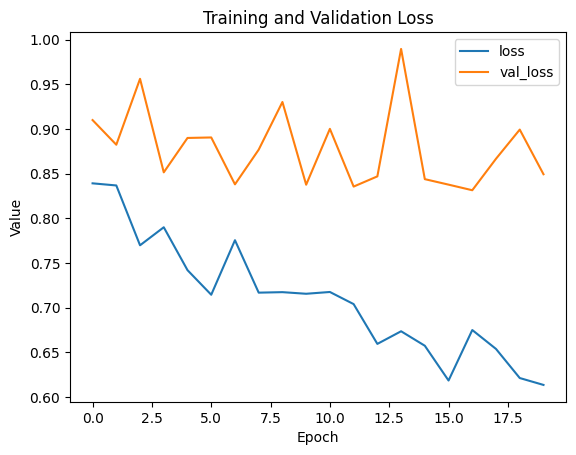

In [75]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

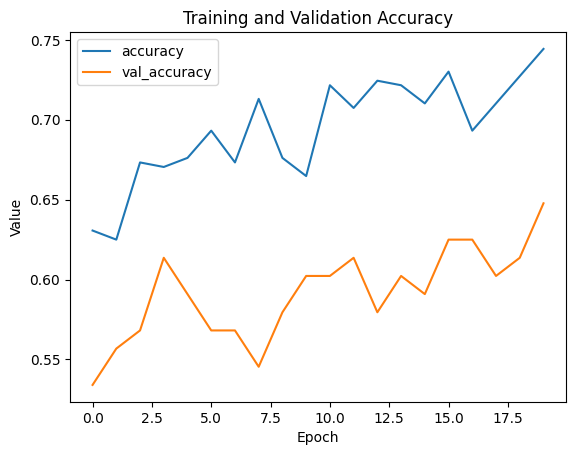

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [77]:
import time

In [78]:
def predict_class(file_path):
  start_time=time.time()
  test_file_path=file_path
  # scores, embeddings, spectrogram = featureExtraction('/content/Angry DOG Bark & Growl (Sound Effects).wav')
  scores, embeddings, spectrogram = featureExtraction(test_file_path)
  # print(spectrogram)
  # print(np.array(embeddings).shape)
  mean_embeddings = np.mean(embeddings.numpy(), axis=0)
  # print(mean_embeddings.shape)
  # print(np.array([mean_embeddings]).shape)
  # print(X_test.shape)

  predicted=np.argmax(cnn_model.predict(np.array([mean_embeddings])))
  print(cnn_model.predict(np.array([mean_embeddings])))

  print(labels[predicted])

  # if(predicted==0):
  #   print("Cat")
  # else:
  #   print("Dog")
  print('Inference Time '+str(round((time.time()-start_time),2))+' seconds')

  # print(np.argmax(model.predict(np.array([mean_embeddings]))))

predict_class('/content/Hungry Stray Cat Meowing For Food.wav')

Sample rate: 16000 Hz
Total duration: 24.04s
Size of the input: 384708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.46201792 0.2332388  0.30474335]]
brushing
Inference Time 0.9 seconds


In [79]:
predict_class('/content/Sad Cat Misses His Owner (Hidden Camera).wav')

Sample rate: 16000 Hz
Total duration: 67.54s
Size of the input: 1080564
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.43417698 0.06637309 0.49944997]]
Isolation
Inference Time 2.63 seconds


In [104]:
predict_class('/content/Hungry Stray Cat Meowing For Food.wav')

Sample rate: 16000 Hz
Total duration: 24.04s
Size of the input: 384708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.44427404 0.3160237  0.23970225]]
brushing
Inference Time 0.84 seconds


In [103]:
predict_class('/content/Loud Meowing Cat Is Hungry.wav')

Sample rate: 16000 Hz
Total duration: 37.02s
Size of the input: 592387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.72518253 0.13109969 0.14371777]]
brushing
Inference Time 1.75 seconds


In [106]:
predict_class('/content/miaow_16k.wav')

<ipython-input-16-458177f3811b>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 6.73s
Size of the input: 107698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.02381114 0.28708443 0.6891045 ]]
Isolation
Inference Time 0.57 seconds


In [87]:
predict_class('/content/cat-sound.wav')

Sample rate: 16000 Hz
Total duration: 111.62s
Size of the input: 1785893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
cat
Inference Time 4.05 seconds


In [88]:
predict_class('/content/Angry DOG Bark & Growl (Sound Effects).wav')

Sample rate: 16000 Hz
Total duration: 21.76s
Size of the input: 348113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
dog
Inference Time 0.82 seconds


In [90]:
predict_class('/content/new-sounds-test-dataset/noise-removed-hunan-dog.wav')

<ipython-input-12-458177f3811b>:8: WavFileWarning: Reached EOF prematurely; finished at 944652 bytes, expected 944660 bytes from header.
  sample_rate, data = wav.read(input_file)


Sample rate: 16000 Hz
Total duration: 4.92s
Size of the input: 78714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
dog
Inference Time 0.39 seconds


In [91]:
predict_class('/content/new-sounds-test-dataset/human-dog.wav')

Sample rate: 16000 Hz
Total duration: 7.81s
Size of the input: 124969
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
dog
Inference Time 0.7 seconds


In [100]:
predict_class('/content/new-sounds-test-dataset/صوت نباح الكلاب الشرسة  Dog sounds - 개 소리 -  कुत्ते की आ (1).wav')

Sample rate: 16000 Hz
Total duration: 569.88s
Size of the input: 9118012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.9985039e-01 4.6373418e-05]]
dog
Inference Time 58.84 seconds


In [99]:
predict_class('/content/new-sounds-test-dataset/🦊 CATS MEOWING - Make Your Cat or Dog Go Crazy! - Sound Effect.wav')

Sample rate: 16000 Hz
Total duration: 109.42s
Size of the input: 1750784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[5.2736985e-04 9.9281466e-01]]
cat
Inference Time 4.35 seconds


In [98]:
predict_class('/content/new-sounds-test-dataset/big-dog-bark-distant-113701-_1_.wav')

Sample rate: 16000 Hz
Total duration: 8.70s
Size of the input: 139180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.506308   0.57126623]]
cat
Inference Time 0.57 seconds


In [101]:
predict_class('/content/new-sounds-test-dataset/FEMALE CAT IN HEAT MEOWING MATE CALLING  - PRANK YOUR PET.wav')

Sample rate: 16000 Hz
Total duration: 536.83s
Size of the input: 8589340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1.6937252e-05 9.9927837e-01]]
cat
Inference Time 32.89 seconds


In [ ]:
predict_class('')

In [ ]:
!python --version

Python 3.10.12


In [ ]:
len(categories)

2

In [ ]:
X_train.shape[1]

1024

In [ ]:
predict_class('/content/German Shepherd Power Barking.wav')

Sample rate: 16000 Hz
Total duration: 34.80s
Size of the input: 556721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Dog
Inference Time 1.56 seconds


In [ ]:
predict_class('')

In [100]:
!python --version

Python 3.10.12


In [ ]:
predict_class('')

In [ ]:
predict_class('')

In [102]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           